In [3]:
import yfinance as yf

In [17]:
df = yf.download('^NSEI', start='2019-01-01', end='2021-12-31')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,10868.849609,10895.349609,10735.049805,10792.500000,10792.500000,309700
2019-01-03,10796.799805,10814.049805,10661.250000,10672.250000,10672.250000,286200
2019-01-04,10699.700195,10741.049805,10628.650391,10727.349609,10727.349609,296600
2019-01-07,10804.849609,10835.950195,10750.150391,10771.799805,10771.799805,269400
2019-01-08,10786.250000,10818.450195,10733.250000,10802.150391,10802.150391,277700
...,...,...,...,...,...,...
2021-12-24,17149.500000,17155.599609,16909.599609,17003.750000,17003.750000,182600
2021-12-27,16937.750000,17112.050781,16833.199219,17086.250000,17086.250000,144800
2021-12-28,17177.599609,17250.250000,17161.150391,17233.250000,17233.250000,176000


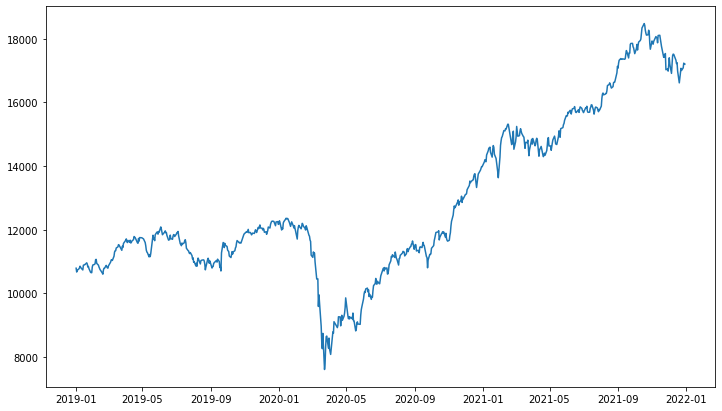

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 7))
plt.plot(df["Close"])
plt.show()

### StationarityTest ( Ad Fuller Test )

In [23]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window = 8, center = False).mean()
    rolstd =  timeseries.rolling(window = 8, center = False).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 7))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

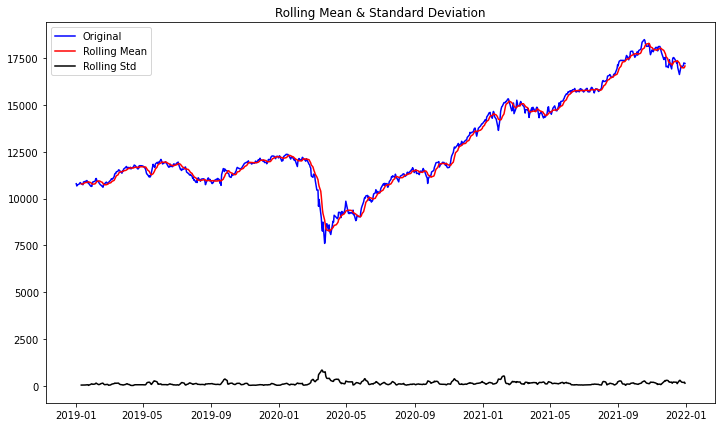

Results of Dickey-Fuller Test:


<IPython.core.display.Javascript object>

p-value = 0.9367. The series is likely non-stationary.
Test Statistic                  -0.214870
p-value                          0.936726
#Lags Used                      11.000000
Number of Observations Used    726.000000
Critical Value (1%)             -3.439389
Critical Value (5%)             -2.865529
Critical Value (10%)            -2.568894
dtype: float64


In [35]:
test_stationarity(df["Close"])

<IPython.core.display.Javascript object>

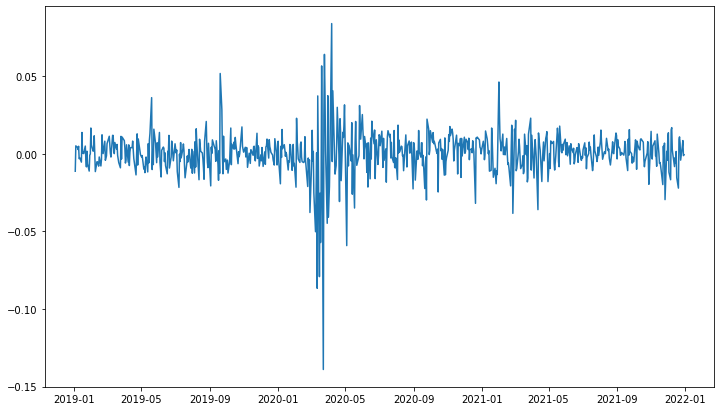

In [45]:
data = np.log(df["Close"])
df["New_Close"] = data.diff(1)
plt.figure(figsize = (12, 7))
plt.plot(df["New_Close"])

### Stationarity Test ( Ad Fuller Test )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

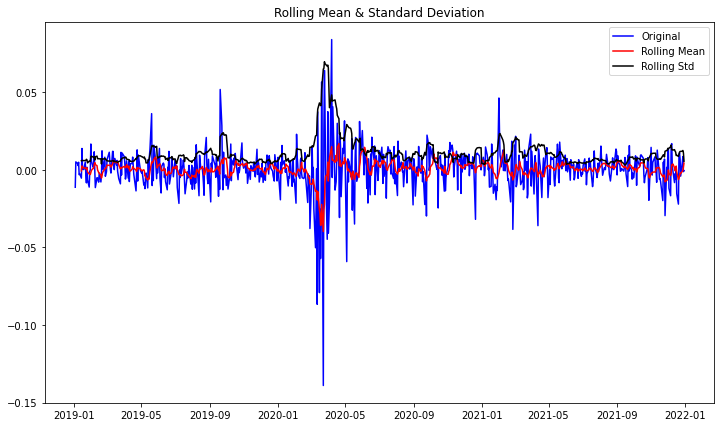

Results of Dickey-Fuller Test:


<IPython.core.display.Javascript object>

p-value = 0.0000. The series is likely stationary.
Test Statistic                -7.695183e+00
p-value                        1.385380e-11
#Lags Used                     1.000000e+01
Number of Observations Used    7.260000e+02
Critical Value (1%)           -3.439389e+00
Critical Value (5%)           -2.865529e+00
Critical Value (10%)          -2.568894e+00
dtype: float64


In [39]:
test_stationarity(df["New_Close"][1:])

In [58]:
# Plot acf and pacf for milk production data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def plot_acf_and_pacf(data):
    lags = 50
    plt.figure(figsize=(12, 4))
    plt.title('ACF of Milt Production Data ')
    plot_acf(data, ax=plt.gca(), lags = 25)
    
    plt.figure(figsize=(12,4))
    plt.title('PACF of Milt Production Data')    
    plot_pacf(data, ax=plt.gca(), method='ywm', lags = 25) 

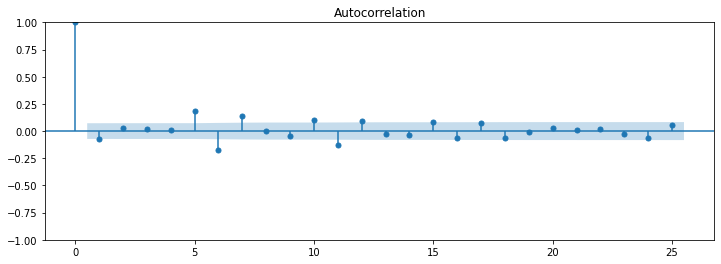

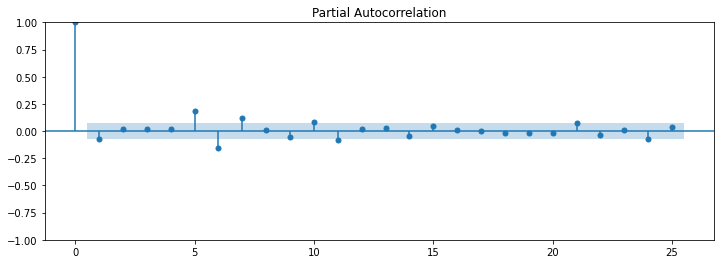

In [59]:
plot_acf_and_pacf(df["New_Close"][1:])

In [62]:
from arch import arch_model
model = arch_model(df["New_Close"][1:], mean='Zero', vol='GARCH', p = 1, q = 1)
model.fit()

Iteration:      1,   Func. Count:      4,   Neg. LLF: -2309.5457909152574
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2309.5457950759646
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1


c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000193. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                       Zero Mean - GARCH Model Results                        
Dep. Variable:              New_Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                2309.55
Distribution:                  Normal   AIC:                          -4613.09
Method:            Maximum Likelihood   BIC:                          -4599.28
                                        No. Observations:                  737
Date:                Wed, Apr 06 2022   Df Residuals:                      737
Time:                        10:24:43   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.8689e-06  1.107e-08    349.575      0.000 [3.